In [41]:
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pandas as pd

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

# data = pd.read_csv('https://raw.githubusercontent.com/amanda-araujo/inferencia-estatistica/main/desempenho.csv', sep = ';')

Saving width.txt to width.txt
Saving size.txt to size.txt
Saving length.txt to length.txt


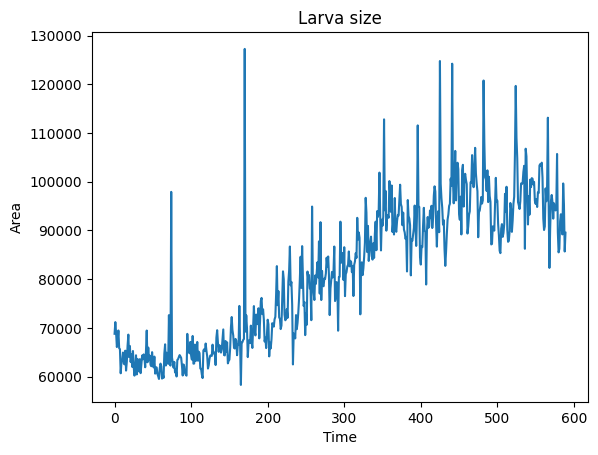

In [ ]:
# Read the file
with open('/content/size.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
size_data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(size_data)))

# Plot the data
plt.plot(indices, size_data)

# Optionally set the title and labels
plt.title('Larva size')
plt.xlabel('Time')
plt.ylabel('Area')

# Display the plot
plt.show()

In [ ]:
statistics.mean([2,3])

2.5

[74, 165, 170, 174, 229, 233, 245, 258, 269, 292, 295, 321, 328, 346, 352, 396, 407, 421, 425, 441, 453, 482, 524, 536, 561, 566, 568, 578]


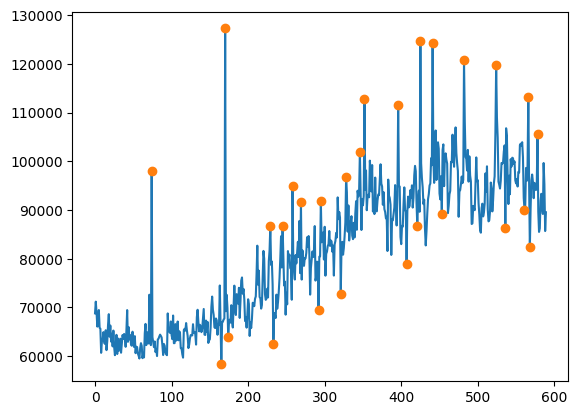

In [ ]:
#mark the abnormal data

def get_average(data, index, window):
  if index == 0:
    return statistics.mean(data[index+1:index+window+1])
  elif index <= window:
    return statistics.mean(data[:index] + data[index+1:index+window+1])
  elif index < len(data)-window:
    return statistics.mean(data[index-window:index] + data[index+1:index+window+1])
  elif index < len(data)-1:
    return statistics.mean(data[index-window:index] + data[index+1:])
  else:
    return statistics.mean(data[index-window:index])

#moving_average = [get_average(size_data, index, 5) for index in range(len(size_data))]

abnormal_index_list = []
for i in range(len(size_data)):
  if abs(size_data[i] - get_average(size_data, i, 5)) > 10000:
    abnormal_index_list.append(i)

print(abnormal_index_list)

plt.plot(size_data)
plt.plot(abnormal_index_list, [size_data[index] for index in abnormal_index_list], 'o')

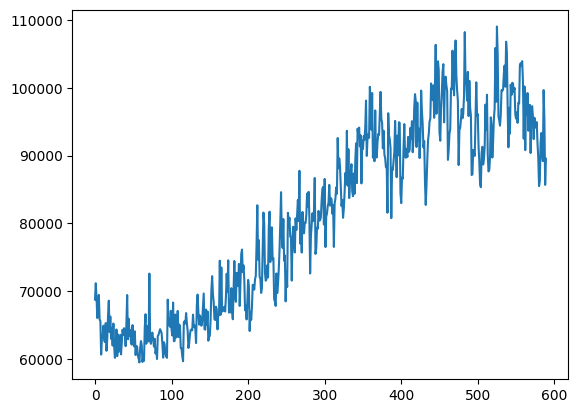

In [ ]:
#replace abnormal data with close average

replaced_data = [0]*len(size_data)

for index in range(len(size_data)):
  if index in abnormal_index_list:
    replaced_data[index] = get_average(size_data, index, 5)
  else:
    replaced_data[index] = size_data[index]

plt.plot(replaced_data)

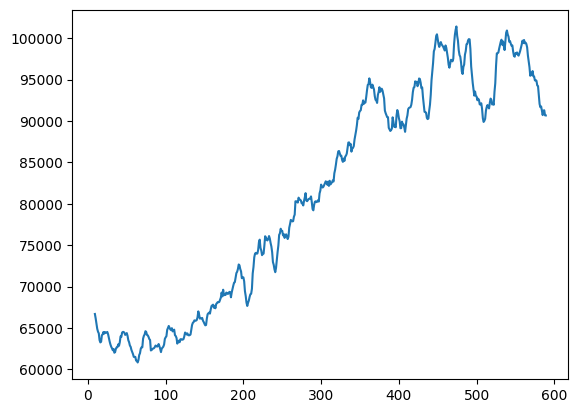

In [ ]:
#calculate moving average

import pandas as pd
data_series = pd.Series(replaced_data)
moving_average = data_series.rolling(window=10).mean()

plt.plot(moving_average)

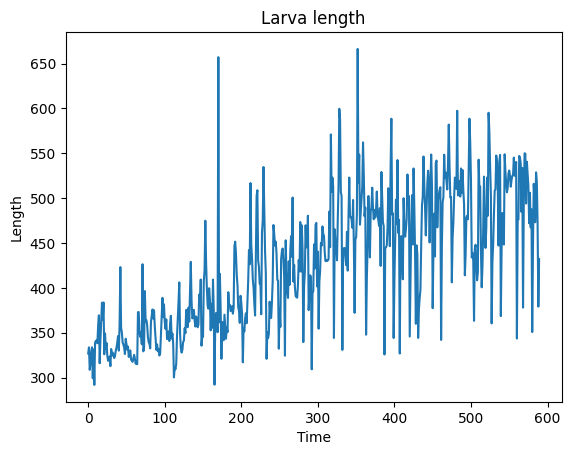

In [40]:
# Read the file
with open('/content/length.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
length_data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(length_data)))

# Plot the data
plt.plot(indices, length_data)

# Optionally set the title and labels
plt.title('Larva length')
plt.xlabel('Time')
plt.ylabel('Length')

# Display the plot
plt.show()

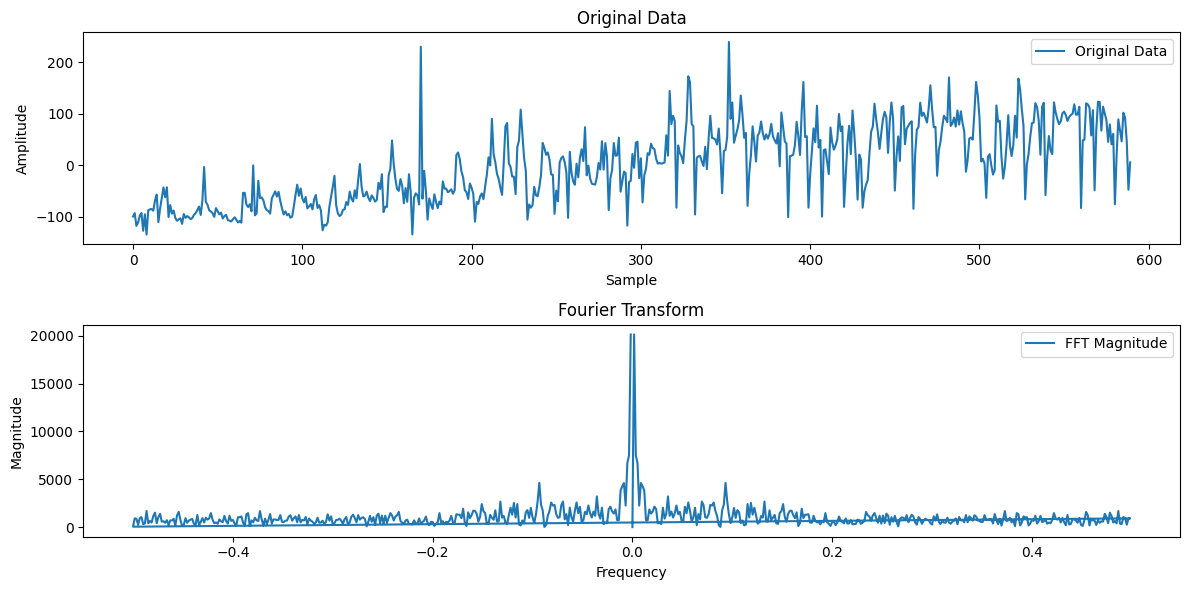

In [54]:
#perform Fourier transform

avg_len = statistics.mean(length_data)
length_data = [data-avg_len for data in length_data]

fft_result = np.fft.fft(length_data)

# Compute the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(length_data))

# Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(length_data, label='Original Data')
plt.title('Original Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Plot the magnitude of the FFT
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result), label='FFT Magnitude')
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

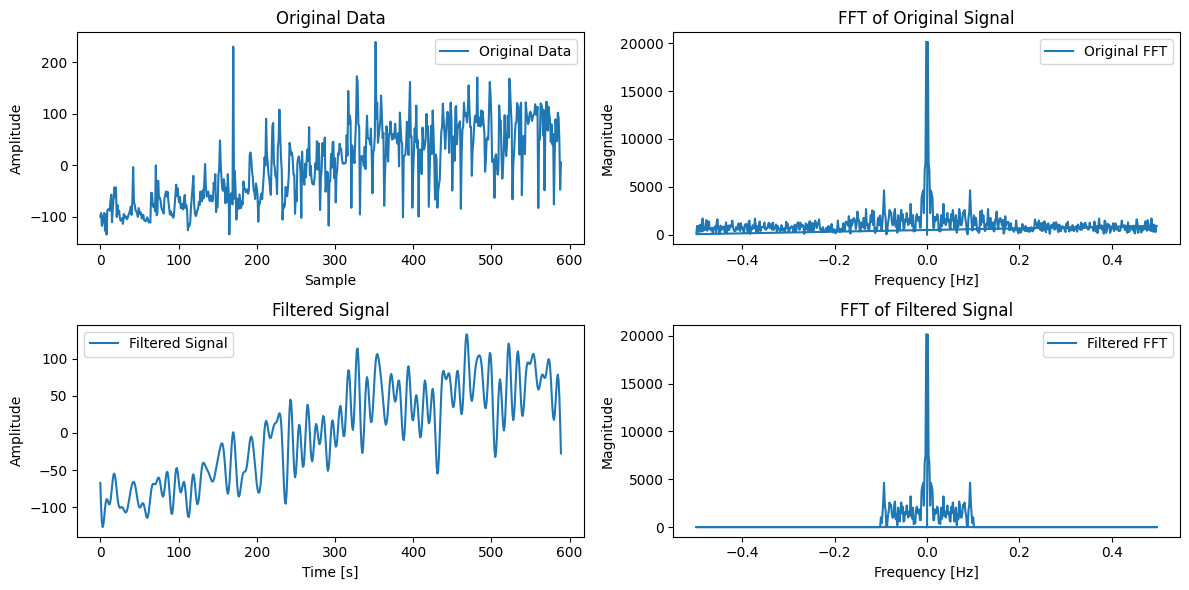

In [57]:
# Define the cutoff frequency for the low-pass filter
cutoff_frequency = 0.1  # in Hz

# Create a low-pass filter mask
filter_mask = np.abs(frequencies) <= cutoff_frequency

# Apply the low-pass filter to the FFT result
filtered_fft_result = fft_result * filter_mask

# Compute the inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft_result)

# Plot the original and filtered signals
plt.figure(figsize=(14, 7))

# Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(length_data, label='Original Data')
plt.title('Original Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Plot FFT of original signal
plt.subplot(2, 2, 2)
plt.plot(frequencies, np.abs(fft_result), label='Original FFT')
plt.title('FFT of Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()

# Plot filtered signal
plt.subplot(2, 2, 3)
plt.plot(filtered_signal.real, label='Filtered Signal')
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Plot FFT of filtered signal
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_fft_result), label='Filtered FFT')
plt.title('FFT of Filtered Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

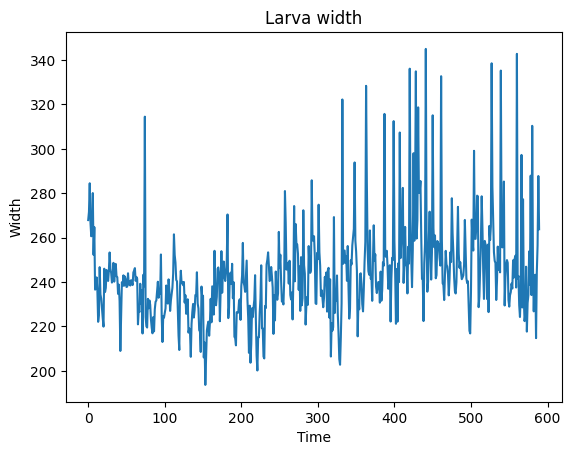

In [ ]:
# Read the file
with open('/content/width.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(data)))

# Plot the data
plt.plot(indices, data)

# Optionally set the title and labels
plt.title('Larva width')
plt.xlabel('Time')
plt.ylabel('Width')

# Display the plot
plt.show()

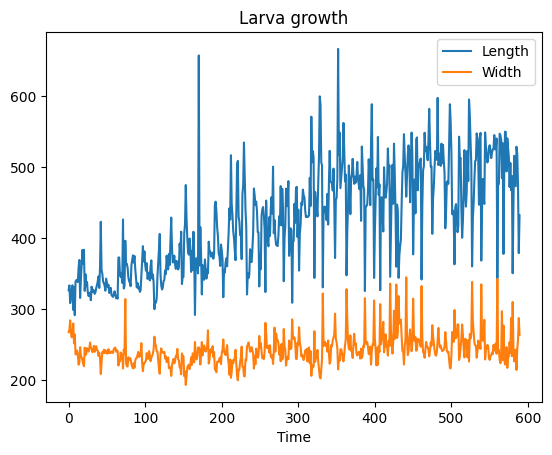

In [ ]:
# Length and Width measures together

# Read the files
data = []

with open('/content/length.txt', 'r') as f:
    data.append(f.read().splitlines())
with open('/content/width.txt', 'r') as f:
    data.append(f.read().splitlines())

for i in range(len(data)):
  # Convert each line to an integer
  data[i] = [float(line) for line in data[i]]

# Create a list of indices
indices = list(range(len(data[0])))

# Plot the data
for i in range(len(data)):
  plt.plot(indices, data[i])

# Optionally set the title and labels
plt.title('Larva growth')
plt.xlabel('Time')
plt.ylabel('')

# Legend for the plot
plt.legend(['Length', 'Width'])

# Display the plot
plt.show()

Time-lapse: 1 pic

In [ ]:
type(indices[1])

int

In [ ]:
data[0]

[472.9541, 379.0818, 432.1478]